# Laporan Tugas Besar 1 Bagian C IF3270 Pembelajaran Mesin
oleh Ignatius Timothy Manullang / 13517044, Fata Nugraha /  13517109, Edward Alexander Jaya /  13517115

## Penjelasan Implementasi

Import library yang dibutuhkan program

In [1]:
import pandas as pd
import numpy as np
import math
from sklearn.neural_network import MLPClassifier # neural network
from sklearn.model_selection import train_test_split
from sklearn import metrics

Berikut merupakan fungsi sigmoid berdasarkan rumus
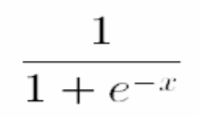
yang akan digunakan untuk perhitungan sigmoid di perceptron. 

In [2]:
def sigmoid(x):
    return 1 / (1 + math.exp(-x))

Class Perceptron

Dalam kelas perceptron, terdapat beberapa parameter, yaitu
* data : list of data input yang akan diproses oleh perceptron
* weight : list of weight dari seluruh data input
* delta weight : list of delta weight dari seluruh data input
* rate : learning rate dari perceptron

init digunakan untuk menginisialisasi perceptron dengan data kosong, weight random, delta weight 0 dan learning rate sesuai yang diinput

input_data digunakan untuk menginput data ke perceptron 

calc_sigmoid digunakan pada proses feed forward untuk mengkalkulasi net dari suatu layer neuron, lalu berdasarkan net itu, mengkalkulasi output dari layer neuron tersebut dengan fungsi sigmoid

calc_delta digunakan saat backpropagation untuk menghitung delta dari suatu data berdasarkan rumus
![calc_delta](images/delta_hidden.png)

update_delta_weight saat backpropagation digunakan untuk memperbarui delta weight dari suatu data berdasarkan rumus
![update_delta_weight](images/delta_weight.png)

update_weight digunakan saat akhir batch untuk memperbarui weight dari suatu data berdasarkan rumus
![update_weight](images/weight.png)

In [3]:
class Perceptron:

    def __init__(self, rate, input_length):
        self.data = []
        self.weight = []
        self.delta_weight = []
        self.rate = rate

        random_matrix = np.random.randn(1, input_length) * np.sqrt(1 / input_length)
        for rand_array in random_matrix:
            for rand_num in rand_array:
                self.weight.append(rand_num)

        # print(self.weight)

        for inp in range(input_length):
            self.delta_weight.append(0)


    def input_data(self, data):
        self.data = []
        for datum in data:
            self.data.append(datum)

    def calc_sigmoid(self):
        jumlah = 0
        for i in range(len(self.data)):
            jumlah += self.data[i] * self.weight[i]
        self.output = sigmoid(jumlah)

    #for backprop
    def calc_delta(self, multiplier):
        self.delta = self.output * (1-self.output) * multiplier

    def update_delta_weight(self):
        for i in range(len(self.delta_weight)):
            self.delta_weight[i] += self.rate * self.delta * self.data[i]

    # End of batch-size
    def update_weight(self):
        for i in range(len(self.weight)):
            self.weight[i] += self.delta_weight[i]
            self.delta_weight[i] = 0

Class myMLP

Dalam kelas myMLP, terdapat beberapa atribut yaitu
* layers : list of data in a layer

* hidden_layer_sizes : list dari jumlah hidden layer yang ada pada 1 layer
* learning_rate : learning rate dari MLP
* max_iter : jumlah iterasi maksimum dari MLP
* error_treshold : batas error untuk mengakhiri proses MLP
* batch_size : ukuran batch sebelum MLP mengupdate weight dari data

fit digunakan untuk melakukan proses MLP berdasarkan input data dan target. Mulai dari inisialisasi data input sampai akhir dari 

update_all_weight digunakan untuk update semua weight dari seluruh perceptron dalam 1 layer

calculate_error digunakan untuk mengkalkulasi error berdasarkan squared error function
![calculate_error](images/calculate_error.png)

initialize_perceptrons_in_layer digunakan untuk memasukkan perceptron ke dalam layer berdasarkan input jumlah perceptron dan jumlah input

feed_forward digunakan untuk mengeksekusi feed forward. feed_forward akan mengkalkulasi net dan output dari suatu input data untuk satu layer, lalu memasukkan output sebagai input data untuk layer selanjutnya, dan mengulanginya untuk semua layer.

backward_prop digunakan untuk mengeksekusi backward propagation.
Untuk layer terakhir
1. Pertama, backward_prop akan mengecek jika hasil kelas output sama dengan target, jika sama, maka valuenya 1, jika beda, maka valuenya 0. 
2. Kedua, backward_prop akan menghitung diff, yaitu perbedaaan antara output dan target. 
3. Ketiga, backward_prop akan menghitung delta dari satu perceptron pada layer terakhir. 
4. Keempat, backward_prop akan memperbarui delta_weight dari satu perceptron pada layer terakhir. 
5. Kelima, backward_prop akan menambahkan total error berdasarkan error dari satu perceptron pada layer terakhir. Proses ini diulangi untuk semua perceptron yang ada pada layer terakhir.
Untuk hidden layer
1. backward_prop akan mengkalkulasi diff, yaitu delta dikali weight, untuk satu perceptron di satu layer.
2. backward_prop akan menghitung delta berdasarkan diff, untuk satu perceptron di satu layer.
3. backward_prop akan menghitung delta weight, untuk satu perceptron di satu layer.
4. backward prop akan mengulangi proses 1-3 untuk semua perceptron dalam satu layer.
5. Lalu, backward_prop akan mengulangi proses 1-4 untuk semua layer yang ada kecuali yang terakhir (karena layer yang terakhir adalah layer output)

predict digunakan untuk memprediksi nilai output dari data input

show_model digunakan untuk menampilkan hasil dari proses MLP

In [4]:
class myMLP:

    def __init__(self, hidden_layer_sizes=[2, 3], learning_rate=0.001, max_iter=200, error_treshold=0.0001, batch_size=32):
        # Attributes
        self.layers = []
        self.hidden_layer_sizes = hidden_layer_sizes
        self.learning_rate = learning_rate
        self.max_iter = max_iter
        self.error_treshold = error_treshold
        self.batch_size = batch_size


    def fit(self, data_inputs, target):
        self.data_inputs = data_inputs
        self.target = target
        self.classes = self.target.unique()

        try:
            #
            number_of_inputs_from_previous_layer = len(self.data_inputs.columns)
            # Initialize perceptrons in the hidden layers (from index 1)
            for layer_idx in range(len(self.hidden_layer_sizes)):
                # hidden_layer = Array of perceptrons
                number_of_perceptrons_current_layer = self.hidden_layer_sizes[layer_idx]
                hidden_layer = self.initialize_perceptrons_in_layer(number_of_perceptrons_current_layer, number_of_inputs_from_previous_layer)
                number_of_inputs_from_previous_layer = self.hidden_layer_sizes[layer_idx]
                self.layers.append(hidden_layer)

            # Construct last (output) layer of perceptrons
            number_of_perceptrons_last_layer = len(self.target.unique())
            number_of_inputs_from_previous_layer = self.hidden_layer_sizes[-1]

            output_layer = self.initialize_perceptrons_in_layer(number_of_perceptrons_last_layer, number_of_inputs_from_previous_layer)
            self.layers.append(output_layer)

        except Exception as e:
            print(e)
            # Construct last (output) layer of perceptrons
            number_of_perceptrons_last_layer = len(self.target.unique())
            number_of_inputs_from_previous_layer = len(self.data_inputs.columns)
            output_layer = self.initialize_perceptrons_in_layer(number_of_perceptrons_last_layer, number_of_inputs_from_previous_layer)
            self.layers.append(output_layer)

        # Start feed forward and backward prop
        number_of_rows = len(data_inputs)
        for iteration in range(self.max_iter):
            error_total = 0
            for row in range(number_of_rows):
                # print("row")
                # print(row)
                self.feed_forward(row)

                # Do backward prop then get error
                error = self.backward_prop(row)
                error_total += error

                if (row % self.batch_size == 0):
                    self.update_all_weights()

            self.update_all_weights()

            if (error_total < self.error_treshold):
                break

    def update_all_weights(self):
        for layer in self.layers:
            for perceptron in layer:
                perceptron.update_weight()

    def calculate_error(self, diff):
        return 0.5 * (diff ** 2)

    def initialize_perceptrons_in_layer (self, number_of_perceptrons, number_of_inputs):
        layer = []
        for idx_perceptron in range(number_of_perceptrons):
            layer.append(Perceptron(self.learning_rate, number_of_inputs+1))
        return layer

    def feed_forward(self, row):
        inputs = []
        outputs = []
        # Initial inputs
        for column in self.data_inputs.columns:
            inputs.append(self.data_inputs[column][row])
        inputs.append(1)

        for layer_idx in range(len(self.layers)):
            outputs.clear()
            for perceptron in self.layers[layer_idx]:
                perceptron.input_data(inputs)
                perceptron.calc_sigmoid()
                outputs.append(perceptron.output)

            inputs.clear()
            for output_data in outputs:
                inputs.append(output_data)

            inputs.append(1)

    def backward_prop(self, row):
        # Last layer
        total_error = 0
        for i in range(len(self.layers[-1])):
            perceptron = self.layers[-1][i]
            # Calculate diff (multiplier):
            if self.classes[i] == self.target[row]:
                result = 1
            else:
                result = 0
            diff = result - perceptron.output
            perceptron.calc_delta(diff)
            perceptron.update_delta_weight()
            total_error += self.calculate_error(diff)

        # Hidden layers
        for layer_idx in range(len(self.layers)-1): #banyaknya layer di layers, kecuali output layer
            layer_size = len(self.layers[-layer_idx-2]) #banyaknya perceptron di layer itu
            for perc_idx in range(layer_size): #untuk setiap perceptron di layer itu
                diff = 0
                for next_perceptron in self.layers[-layer_idx-1]:

                    diff += next_perceptron.delta * next_perceptron.weight[perc_idx]
                self.layers[-layer_idx-2][perc_idx].calc_delta(diff)
                self.layers[-layer_idx-2][perc_idx].update_delta_weight()

        return total_error

    def predict(self, data_inputs):
        inputs = []
        outputs = []
        predictions = []
        for row in range(len(data_inputs)):
            inputs.clear()
            outputs.clear()
            # Initial inputs
            for column in data_inputs.columns:
                inputs.append(data_inputs[column][row])
            inputs.append(1)

            for layer_idx in range(len(self.layers)):
                outputs.clear()
                for perceptron in self.layers[layer_idx]:
                    perceptron.input_data(inputs)
                    perceptron.calc_sigmoid()
                    outputs.append(perceptron.output)
                inputs.clear()
                for output in outputs:
                    inputs.append(output)
                inputs.append(1)
            idx = outputs.index(max(outputs))
            predictions.append(self.classes[idx])
        return predictions

    def show_model(self):
        for layer_idx in range(len(self.layers)):
            for perceptron_idx in range(len(self.layers[layer_idx])):
                for weight_idx in range(len(self.layers[layer_idx][perceptron_idx].weight)):
                    print("Weight ", weight_idx, "-", "[", layer_idx, "][", perceptron_idx, "]: ", self.layers[layer_idx][perceptron_idx].weight[weight_idx])

## Hasil Eksekusi 

In [5]:
data = pd.read_csv("iris.csv")

mlp = myMLP(max_iter = 4001, hidden_layer_sizes=[100])
inputs = data.drop('species', axis = 1)
target = data[['species']]

mlp.fit(inputs,target)

print("Model (weights):")
mlp.show_model()

#training
df = pd.concat([inputs, target], axis=1)
train, test = train_test_split(df, test_size=0.3)

trainX = train[['sepal_length','sepal_width','petal_length','petal_width']] # taking the training data features
trainY = train.species # output of our training data
testX = test[['sepal_length','sepal_width','petal_length','petal_width']] # taking test data features
testY = test.species   # output value of test data

trainX = trainX.reset_index(drop=True)
trainY = trainY.reset_index(drop=True)
testX = testX.reset_index(drop=True)
testY = testY.reset_index(drop=True)

mlp2 = myMLP(max_iter = 4001, hidden_layer_sizes=[100])
mlp2.fit(trainX, trainY)
prediction = mlp2.predict(testX)
val = 0
for i in range(len(prediction)):
	if prediction[i] == testY.values[i]:
		val += 1
print("Tested : " + str(len(prediction)))
print("True : " + str(val))
print("Accuracy : " + str(val/len(prediction)))

AttributeError: 'DataFrame' object has no attribute 'unique'

## Perbandingan dengan hasil MLP sklearn

### MLP sklearn

In [ ]:
data = pd.read_csv("iris.csv")
data.sample(5)

In [ ]:
data.head(5)

In [ ]:
target = data[['species']].replace(['Iris-setosa','Iris-versicolor','Iris-virginica'],[0,1,2])
target.sample(5)

In [ ]:
newData = data.drop('species', axis = 1)
df = pd.concat([newData, target], axis=1)
df.sample(5)

In [ ]:
train, test = train_test_split(df, test_size=0.3)
trainX = train[['sepal_length','sepal_width','petal_length','petal_width']] # taking the training data features
trainY=train.species# output of our training data
testX= test[['sepal_length','sepal_width','petal_length','petal_width']] # taking test data features
testY =test.species   #output value of test data
trainX.head(5)

In [ ]:
trainY.head(5)

In [ ]:
testX.head(5)

In [ ]:
testY.head(5)

In [ ]:
clf1 = MLPClassifier(solver='sgd', batch_size=32, alpha=0, momentum=0, nesterovs_momentum=False, activation='logistic', max_iter=4001, hidden_layer_sizes=(100))

clf1.fit(newData,target)
print("Model (weights)")
print(clf1.coefs_)

In [ ]:
clf2 = MLPClassifier(solver='sgd', batch_size=32, alpha=0, momentum=0, nesterovs_momentum=False, activation='logistic', max_iter=4001, hidden_layer_sizes=(100))
clf2.fit(trainX, trainY)

prediction = clf2.predict(testX)
print("Prediction")
print(prediction)

print("Values of testY")
print(testY.values)

print('The accuracy of the Multi-layer Perceptron is:',metrics.accuracy_score(prediction,testY))

Pembagian tugas setiap anggota kelompok

| NIM | Nama | Tugas |
| -- | -- | -- |
| 13517044 | Ignatius Timothy Manullang | laporan, testing, analisis  |
| 13517109 | Fata Nugraha | class Perceptron, debug class myMLP |
| 13517115 | Edward Alexander Jaya | basic class myMLP |